# Panel Data Analysis

In [30]:
import pandas as pd
import os
from pathlib import Path
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

## Reading data

In [31]:
cwd =os.getcwd()
p_cwd = Path(cwd).parent.absolute()

In [32]:
df = pd.read_csv(os.path.join(p_cwd, "data","phen_data_ml.csv"), parse_dates = ['date'])

In [33]:
df.head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day,date,cult_season
0,5144,11.23330,53.9833,5,0,2390300,Tilia,Tilia platyphyllos,60,1951,2,1951-01-02,0
1,2255,8.96667,51.3333,250,256,1360100,Corylus,Corylus avellana,60,1951,5,1951-01-05,0
2,1967,9.00000,49.6667,220,221,1360100,Corylus,Corylus avellana,60,1951,6,1951-01-06,0
3,4014,10.93330,49.8000,260,242,1360100,Corylus,Corylus avellana,60,1951,7,1951-01-07,0
4,512,10.13330,52.0167,120,122,1600100,Galanthus,Galanthus nivalis,60,1951,10,1951-01-10,0


## Preliminary analysis

In [34]:
df.dtypes

s_id                    int64
lon                   float64
lat                   float64
alt                     int64
alt_dem                 int64
gss_id                  int64
genus                  object
species                object
phase_id                int64
year                    int64
day                     int64
date           datetime64[ns]
cult_season             int64
dtype: object

In [35]:
df= df.rename({'day': 'day_year'}, axis=1)

In [36]:
df.head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,day_year,date,cult_season
0,5144,11.23330,53.9833,5,0,2390300,Tilia,Tilia platyphyllos,60,1951,2,1951-01-02,0
1,2255,8.96667,51.3333,250,256,1360100,Corylus,Corylus avellana,60,1951,5,1951-01-05,0
2,1967,9.00000,49.6667,220,221,1360100,Corylus,Corylus avellana,60,1951,6,1951-01-06,0
3,4014,10.93330,49.8000,260,242,1360100,Corylus,Corylus avellana,60,1951,7,1951-01-07,0
4,512,10.13330,52.0167,120,122,1600100,Galanthus,Galanthus nivalis,60,1951,10,1951-01-10,0


In [37]:
df['month']=df['date'].dt.month

In [38]:
df['day']=df['date'].dt.day

In [39]:
df.drop('date', axis=1, inplace=True)

In [40]:
df = df[['s_id','lon','lat','alt','alt_dem','gss_id','genus','species','phase_id','year','month','day','day_year','cult_season']]

In [41]:
df.head()

,s_id,lon,lat,alt,alt_dem,gss_id,genus,species,phase_id,year,month,day,day_year,cult_season
0,5144,11.23330,53.9833,5,0,2390300,Tilia,Tilia platyphyllos,60,1951,1,2,2,0
1,2255,8.96667,51.3333,250,256,1360100,Corylus,Corylus avellana,60,1951,1,5,5,0
2,1967,9.00000,49.6667,220,221,1360100,Corylus,Corylus avellana,60,1951,1,6,6,0
3,4014,10.93330,49.8000,260,242,1360100,Corylus,Corylus avellana,60,1951,1,7,7,0
4,512,10.13330,52.0167,120,122,1600100,Galanthus,Galanthus nivalis,60,1951,1,10,10,0


In [42]:
df.drop('genus', axis=1, inplace=True)

In [66]:
df.groupby(by='species').size().sort_values()

species
Ambrosia artemisiifolia         2
Populus tremula               844
Betula pubescens             1593
Cornus mas                   6871
Helianthus annuus           27465
Artemisia vulgaris          29782
Prunus padus                37645
Prunus persica              46889
Philadelphus coronarius     47287
Symphoricarpos albus        49327
Colchicum autumnale         60060
Vitis vinifera              61499
Alopecurus pratensis        72850
Rubus rubus                 87920
Calluna vulgaris            97713
Acer platanoides           100917
Tilia cordata              109369
Forsythia suspensa         110671
Prunus spinosa             114206
Rubus idaeus               117538
Corylus avellana           118844
Dactylis glomerata         119918
Anemone nemorosa           127141
Tussilago farfara          130548
Robinia pseudoacacia       141717
Salix caprea               143445
Taraxacum officinale       146492
Larix decidua              149535
Syringa vulgaris           151431
Galant

In [44]:
df.head()

,s_id,lon,lat,alt,alt_dem,gss_id,species,phase_id,year,month,day,day_year,cult_season
0,5144,11.23330,53.9833,5,0,2390300,Tilia platyphyllos,60,1951,1,2,2,0
1,2255,8.96667,51.3333,250,256,1360100,Corylus avellana,60,1951,1,5,5,0
2,1967,9.00000,49.6667,220,221,1360100,Corylus avellana,60,1951,1,6,6,0
3,4014,10.93330,49.8000,260,242,1360100,Corylus avellana,60,1951,1,7,7,0
4,512,10.13330,52.0167,120,122,1600100,Galanthus nivalis,60,1951,1,10,10,0


In [67]:
df_barley = df[df['species']=='Hordeum vulgare']

In [71]:
len(df_barley[df_barley['phase_id']==60])

0

In [69]:
df_barley.to_csv("barley_obs.csv", index=False)

In [58]:
df_test_sp['year'].unique()

array([1951, 1952, 1953, 1954, 1988, 1989, 1990, 2003, 2004, 2005, 2006,
       1984, 1985, 1986, 1959, 1960, 1961, 1993, 1994, 2011, 2012, 2013,
       2014, 1964, 1965, 1987, 2015, 2016, 2017, 2018, 2019, 1980, 1981,
       1982, 1972, 1973, 1974, 1975, 1966, 1967, 1997, 1998, 1999, 1979,
       1970, 1971, 1976, 1957, 1958, 1991, 1992, 2000, 2001, 2002, 1955,
       1956, 1977, 1978, 1983, 1968, 1969, 2007, 2008, 2009, 2010, 1995,
       1996, 1962, 1963])

In [57]:
df_test_sp['phase_id'].unique()

array([7])

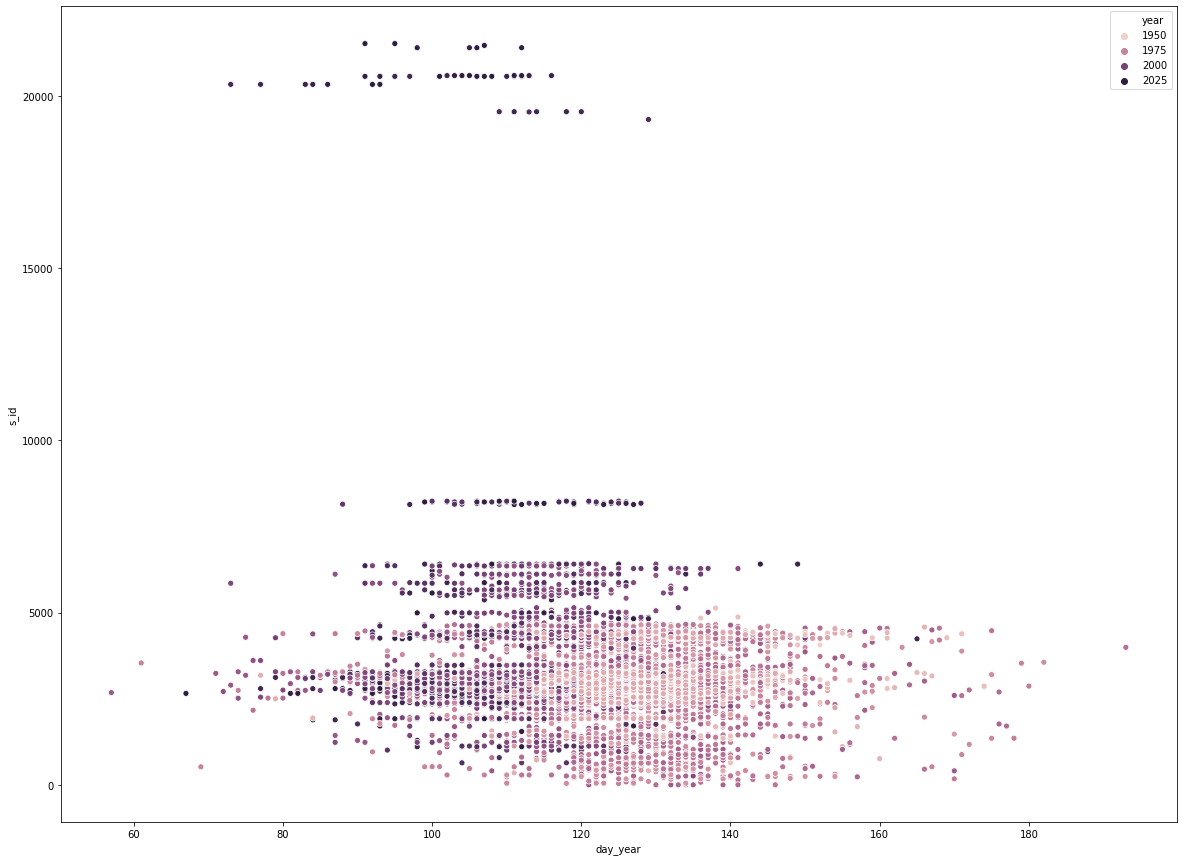

In [62]:
plt.figure(figsize=(20,15))
sns.scatterplot(data =df_test_sp, x='day_year', y='s_id', hue='year')

In [ ]:
df.drop(['lon','lat','alt', 'alt_dem', 'gss_id'], axis=1, inplace=True)

In [ ]:
df.head(10)

In [ ]:
df_ss = pd.DataFrame(df.groupby(by=['s_id','year','species', 'phase_id']).size(), columns=['obs_no'])

In [ ]:
df_ss

In [ ]:
df_ss['obs_no'].unique()

In [ ]:
df_multi_obs = df_ss[df_ss['obs_no']==2]

In [ ]:
df_multi_obs

In [ ]:
df_multi_obs.to_csv("multi_obs.csv")